# Wie entwickeln sich die Einnahmen der PV-Anlage über verschiedene Zeiträume?

In [14]:
import pandas as pd

df26 = pd.read_csv("Bereinigt/cleaned_26_measurements.csv", parse_dates=["timestamp"])
df27 = pd.read_csv("Bereinigt/cleaned_27_measurements.csv", parse_dates=["timestamp"])
df28 = pd.read_csv("Bereinigt/cleaned_28_measurements.csv", parse_dates=["timestamp"])

# Aus Metadaten
EINSPEIS_TARIF = 0.185  # € pro kWh
# Einheitlicher Tarif
TARIF = 0.185  # €/kWh

df26["revenue_eur"] = df26["pv_energy_kwh"] * EINSPEIS_TARIF

## Einnahmen pro Tag

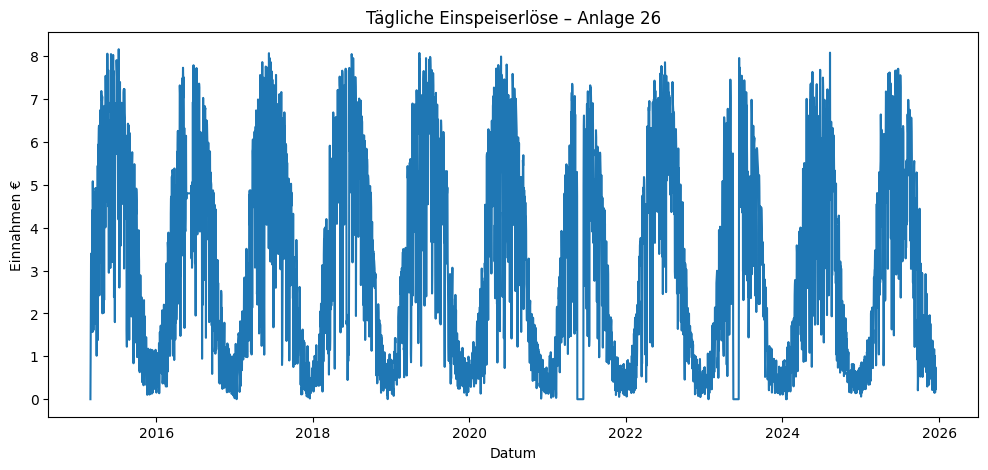

In [15]:
import matplotlib.pyplot as plt

daily_revenue = (
    df26
    .groupby(df26["timestamp"].dt.date)["revenue_eur"]
    .sum()
)

plt.figure(figsize=(12,5))
daily_revenue.plot()
plt.xlabel("Datum")
plt.ylabel("Einnahmen €")
plt.title("Tägliche Einspeiserlöse – Anlage 26")
plt.show()

## Einnahmen pro Monat

C:\Users\Hagen\AppData\Local\Temp\ipykernel_6484\2080532564.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .groupby(df26["timestamp"].dt.to_period("M"))["revenue_eur"]


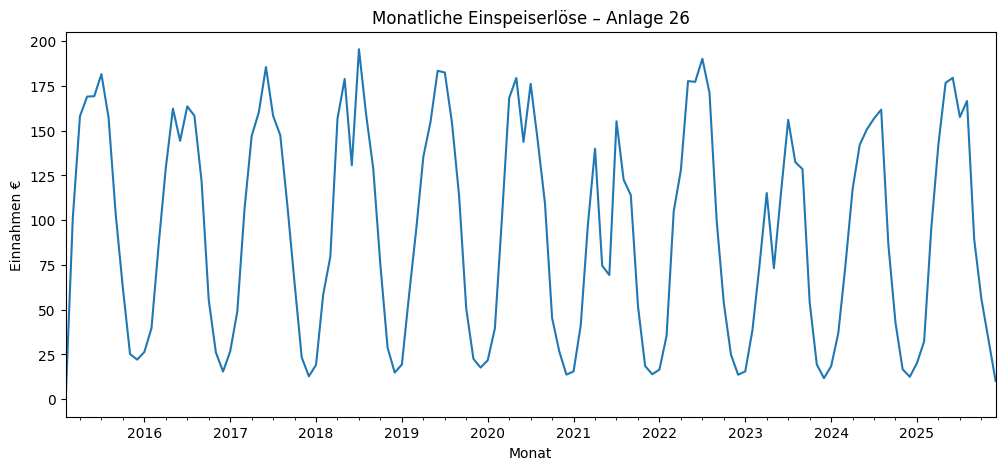

In [12]:
monthly_revenue = (
    df26
    .groupby(df26["timestamp"].dt.to_period("M"))["revenue_eur"]
    .sum()
)

plt.figure(figsize=(12,5))
monthly_revenue.plot()
plt.xlabel("Monat")
plt.ylabel("Einnahmen €")
plt.title("Monatliche Einspeiserlöse – Anlage 26")
plt.show()


## Einnahmen pro Jahr

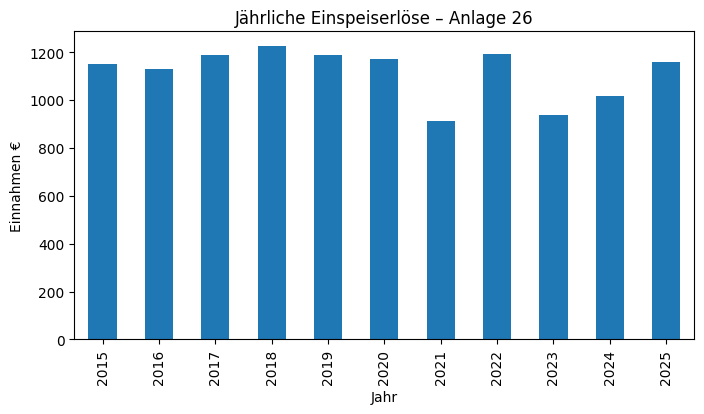

In [13]:
yearly_revenue = (
    df26
    .groupby(df26["timestamp"].dt.year)["revenue_eur"]
    .sum()
)

plt.figure(figsize=(8,4))
yearly_revenue.plot(kind="bar")
plt.xlabel("Jahr")
plt.ylabel("Einnahmen €")
plt.title("Jährliche Einspeiserlöse – Anlage 26")
plt.show()

# Welche Anlage generiert am meisten Gewinn pro installierter kWp?

### Annahme: Alle anlagen haben den gleichen Tarif

In [16]:
# installierte Leistung aus Metadaten
KWPS = {
    "26": 7.44,
    "27": 11.75,
    "28": 9.24
}

# Jahreserlös pro Anlage
def annual_revenue(df):
    df["revenue"] = df["pv_energy_kwh"] * TARIF
    return df.groupby(df["timestamp"].dt.year)["revenue"].sum().mean()

rev26 = annual_revenue(df26)
rev27 = annual_revenue(df27)
rev28 = annual_revenue(df28)

In [17]:
# Ertrag in €/kWp
comparison = pd.DataFrame({
    "Anlage": ["26", "27", "28"],
    "Jahreserlös (€)": [rev26, rev27, rev28],
    "Leistung (kWp)": [KWPS["26"], KWPS["27"], KWPS["28"]]
})

comparison["€ pro kWp"] = comparison["Jahreserlös (€)"] / comparison["Leistung (kWp)"]
comparison

,Anlage,Jahreserlös (€),Leistung (kWp),€ pro kWp
0,26,1115.381427,7.44,149.916858
1,27,2162.942872,11.75,184.080244
2,28,1669.098968,9.24,180.638416


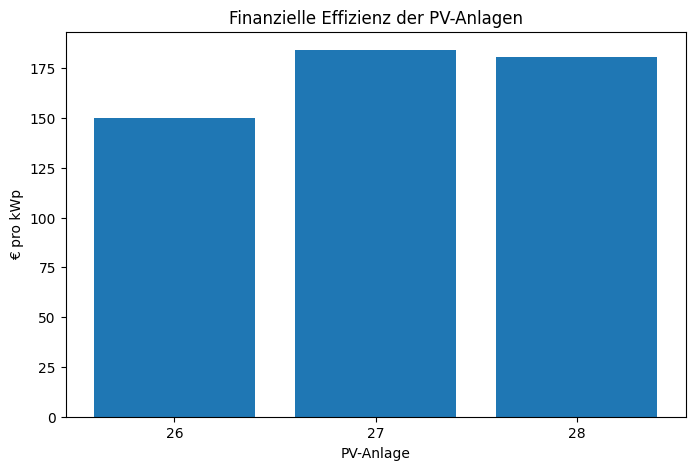

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(comparison["Anlage"], comparison["€ pro kWp"])
plt.ylabel("€ pro kWp")
plt.xlabel("PV-Anlage")
plt.title("Finanzielle Effizienz der PV-Anlagen")
plt.show()

# Amortisationszeit Anlage 26

### Annahme: Investitionskosten von 1600 € por kWp

In [19]:
INVEST_KOSTEN_PRO_KWP = 1600  # €
KWP_26 = 7.44

INVEST_26 = INVEST_KOSTEN_PRO_KWP * KWP_26
INVEST_26

11904.0

In [20]:
df26 = pd.read_csv("Bereinigt/cleaned_26_measurements.csv", parse_dates=["timestamp"])
df26["revenue"] = df26["pv_energy_kwh"] * TARIF

annual_revenue = (
    df26
    .groupby(df26["timestamp"].dt.year)["revenue"]
    .sum()
    .mean()
)

annual_revenue

np.float64(1115.3814270541252)

In [21]:
amortisation_years = INVEST_26 / annual_revenue
amortisation_years

np.float64(10.672582231748372)

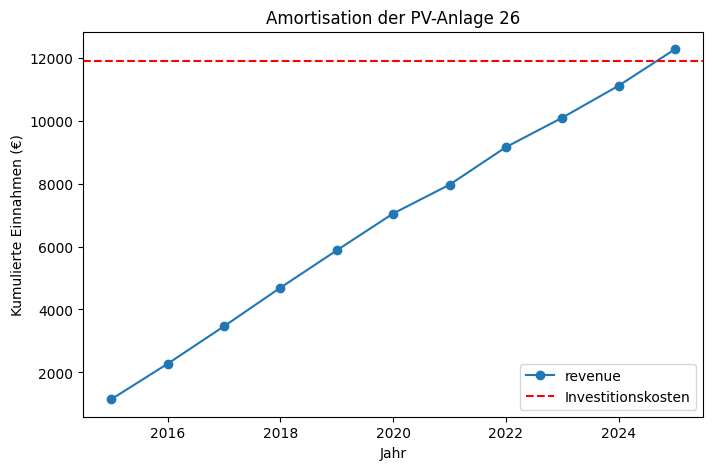

In [22]:
import matplotlib.pyplot as plt

yearly_revenue = (
    df26
    .groupby(df26["timestamp"].dt.year)["revenue"]
    .sum()
)

cumulative = yearly_revenue.cumsum()

plt.figure(figsize=(8,5))
cumulative.plot(marker="o")
plt.axhline(INVEST_26, color="red", linestyle="--", label="Investitionskosten")
plt.ylabel("Kumulierte Einnahmen (€)")
plt.xlabel("Jahr")
plt.title("Amortisation der PV-Anlage 26")
plt.legend()
plt.show()